In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set_theme()
sns.set(rc={'figure.figsize': (10, 8)})

In [3]:
ads = pd.read_csv('ads.csv')
history = pd.read_csv('history.csv')
target = pd.read_csv('target.csv')
sample_solution = pd.read_csv('sample_solution.csv')
users = pd.read_csv('users.csv')

In [4]:
users.head()

,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4


<AxesSubplot:xlabel='age', ylabel='Count'>

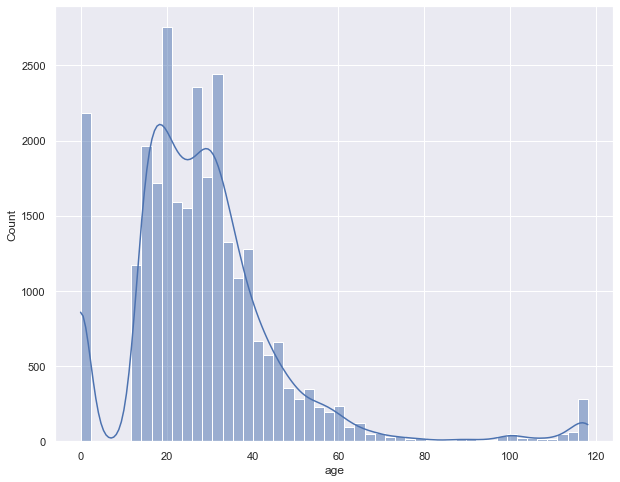

In [5]:
sns.histplot(users, x="age", bins=50, kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

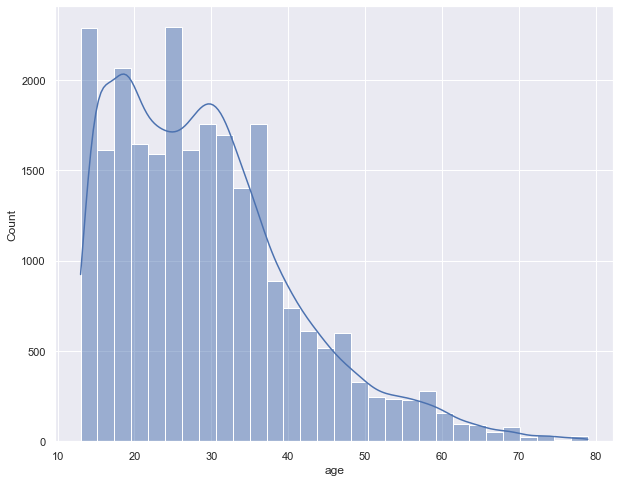

In [6]:
sns.histplot(users[(users.age > 0) & (users.age < 80)], x="age", bins=30, kde=True)

<AxesSubplot:xlabel='sex', ylabel='Count'>

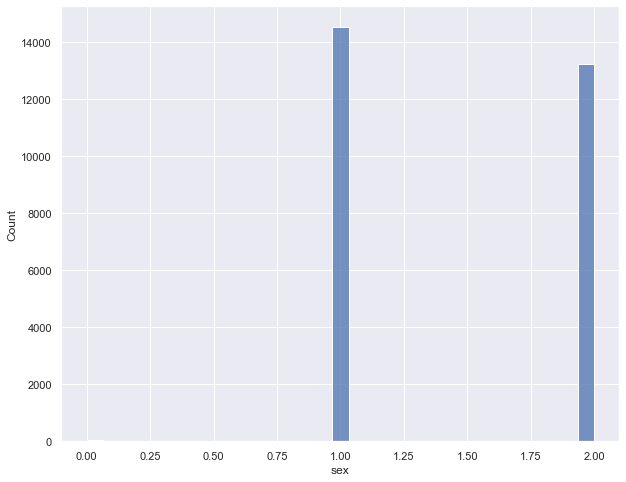

In [7]:
sns.histplot(users, x="sex")

<AxesSubplot:xlabel='city_id', ylabel='Count'>

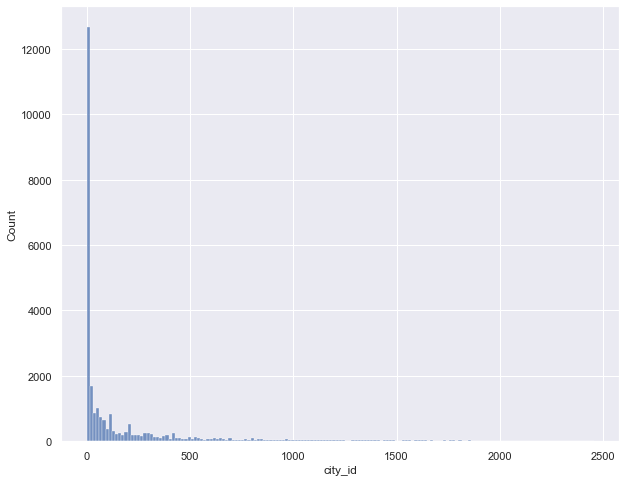

In [8]:
sns.histplot(users, x="city_id")

In [9]:
history.head()

,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148


<AxesSubplot:xlabel='hour', ylabel='Count'>

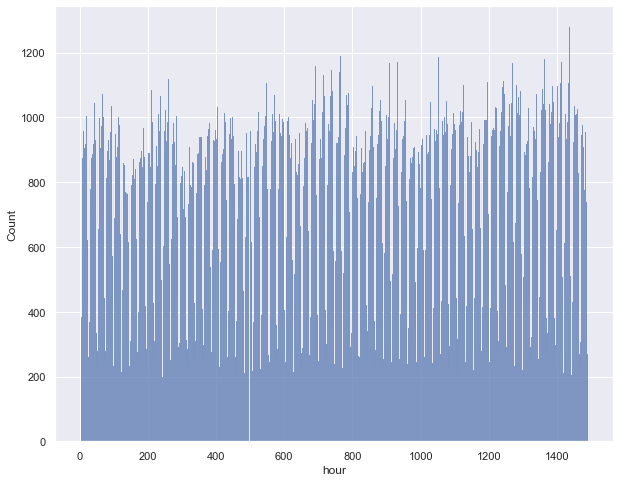

In [10]:
sns.histplot(history, x="hour", bins=history.hour.max())

<AxesSubplot:xlabel='cpm', ylabel='Count'>

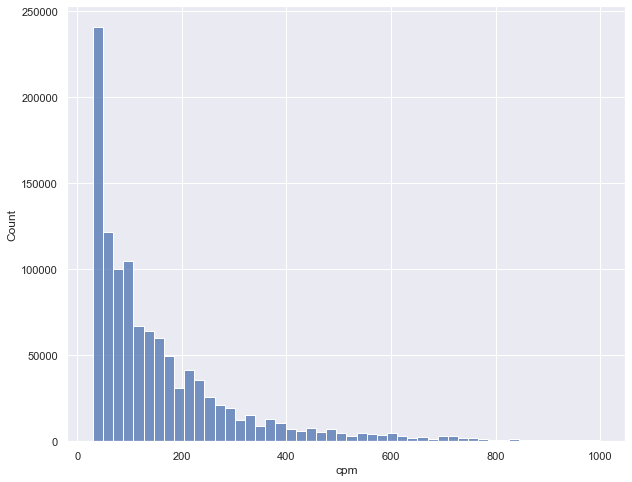

In [11]:
sns.histplot(history[history.cpm < 1000], x="cpm", bins=50)

21


<AxesSubplot:xlabel='publisher', ylabel='Count'>

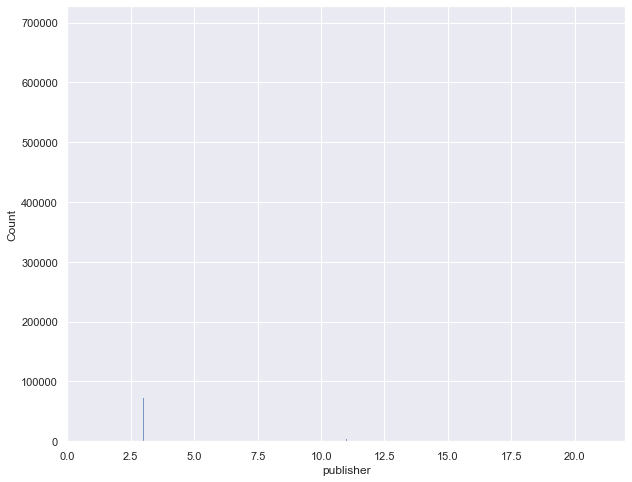

In [12]:
print(len(history.publisher.unique()))
sns.histplot(history, x="publisher")

In [13]:
ads.head()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids,ad_id
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",0
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",1
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",2
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",3
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",4


<AxesSubplot:xlabel='cpm', ylabel='Count'>

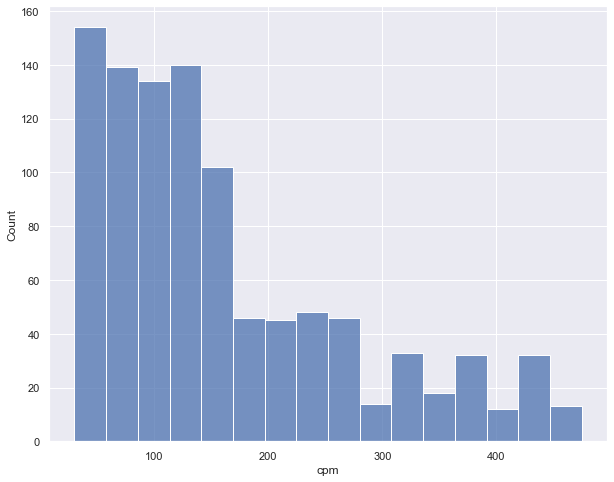

In [14]:
sns.histplot(ads, x="cpm")

<AxesSubplot:xlabel='audience_size', ylabel='Count'>

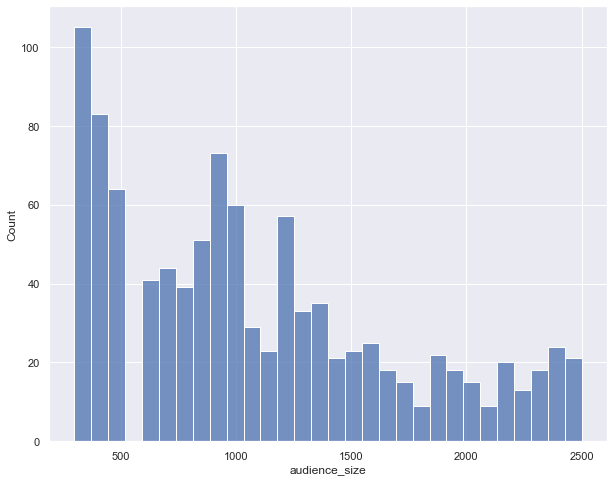

In [15]:
sns.histplot(ads, x="audience_size", bins=30)

In [16]:
sample_solution.head()

,ad_id,at_least_one
0,700,0.118536
1,701,0.118536
2,702,0.118536
3,703,0.118536
4,704,0.118536


In [17]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ad_id         700 non-null    int64  
 1   at_least_one  700 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.1 KB


In [18]:
target.head()

,ad_id,at_least_one
0,0,0.0430
1,1,0.0130
2,2,0.0878
3,3,0.2295
4,4,0.3963


<AxesSubplot:xlabel='at_least_one', ylabel='Count'>

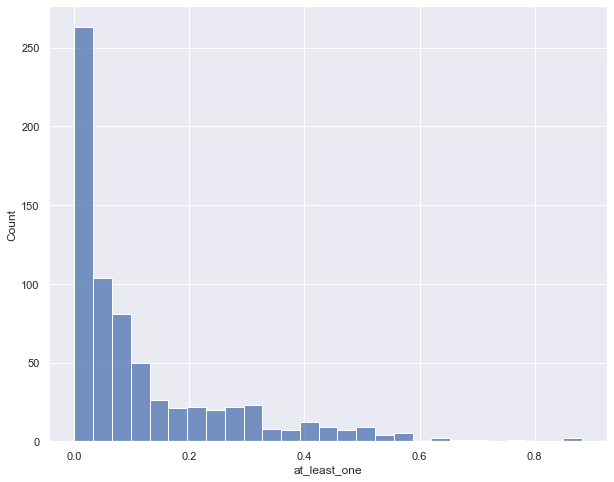

In [19]:
sns.histplot(target, x="at_least_one")

In [20]:
# Какой трафик на каждой платформе?

# Посчитаем для каждого часа: сколько постов было на каждой платформе?

n_publishers = len(history.publisher.unique())
posts_per_hour_by_publishers = []
TAKE_FIRST_N_HOURS = 24 * 4

for hour, hour_data in history[history.hour < TAKE_FIRST_N_HOURS].groupby('hour'):
    publishers_posts = hour_data.value_counts('publisher')

    counts = [0 for _ in range(n_publishers)]
    for pub_id, posts_n in list(publishers_posts.items()):
        counts[pub_id-1] = posts_n

    posts_per_hour_by_publishers.append([hour] + counts)


df = pd.DataFrame.from_records(posts_per_hour_by_publishers, columns=['hour'] + list(history.publisher.unique()))
df.head()

,hour,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,21,20
0,3,100,67,11,1,3,1,7,0,2,...,0,0,0,0,2,1,0,0,0,0
1,4,173,51,10,0,1,1,11,1,2,...,1,0,0,0,1,0,0,0,0,0
2,5,246,91,21,1,1,4,12,3,2,...,2,1,0,0,0,0,0,0,0,0
3,6,346,95,27,2,0,5,16,1,4,...,0,0,0,0,1,1,0,0,0,0
4,7,488,157,29,2,5,5,42,3,6,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='hour'>

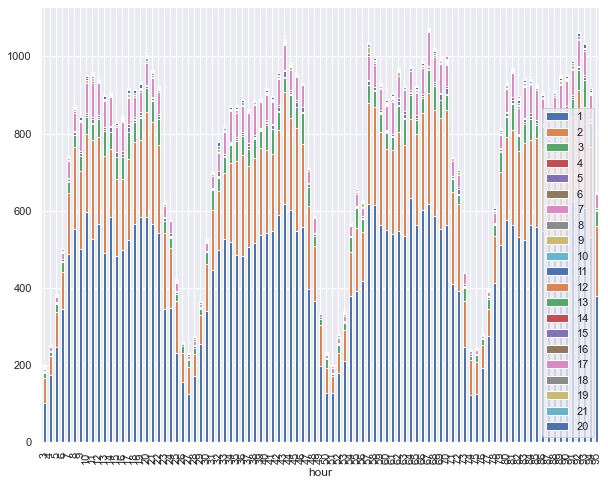

In [21]:
df.plot.bar(x='hour', stacked=True)

In [22]:
# ads = pd.merge(ads, target, on="ad_id")
# ads.head()

In [23]:
# Длины списков
ads = ads.assign(n_publishers=ads.publishers.apply(lambda s: len(s.split(','))))
ads = ads.assign(n_users=ads.user_ids.apply(lambda s: len(s.split(','))))
ads.head()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids,ad_id,n_publishers,n_users
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",0,2,1906
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",1,2,1380
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",2,6,888
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",3,2,440
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",4,4,1476


In [24]:
# Длительность кампании
ads = ads.assign(duration=ads.hour_end - ads.hour_start)
ads.head()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids,ad_id,n_publishers,n_users,duration
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",0,2,1906,95
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",1,2,1380,6
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",2,6,888,20
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",3,2,440,82
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",4,4,1476,238


In [25]:
# Средний пол, т.е. соотношение полов
ads = ads.assign(avg_sex=ads.user_ids.apply(lambda s: users.iloc[[int(id) for id in s.split(',')]].sex.mean()))
ads.head()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids,ad_id,n_publishers,n_users,duration,avg_sex
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",0,2,1906,95,1.462225
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",1,2,1380,6,1.467391
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",2,6,888,20,1.467342
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",3,2,440,82,1.454545
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",4,4,1476,238,1.386856


In [26]:
# Медианный возраст (наверное лучше в силу выбросов (0 и 120+))
ads = ads.assign(med_age=ads.user_ids.apply(lambda s: users.iloc[[int(id) for id in s.split(',')]].age.median()))
ads = ads.assign(avg_age=ads.user_ids.apply(lambda s: users.iloc[[int(id) for id in s.split(',')]].age.mean()))
ads.head()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids,ad_id,n_publishers,n_users,duration,avg_sex,med_age,avg_age
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",0,2,1906,95,1.462225,27.0,28.721406
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",1,2,1380,6,1.467391,26.0,28.611594
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",2,6,888,20,1.467342,28.0,29.055180
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",3,2,440,82,1.454545,26.0,27.763636
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",4,4,1476,238,1.386856,44.0,44.760840


In [27]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpm            1008 non-null   float64
 1   hour_start     1008 non-null   int64  
 2   hour_end       1008 non-null   int64  
 3   publishers     1008 non-null   object 
 4   audience_size  1008 non-null   int64  
 5   user_ids       1008 non-null   object 
 6   ad_id          1008 non-null   int64  
 7   n_publishers   1008 non-null   int64  
 8   n_users        1008 non-null   int64  
 9   duration       1008 non-null   int64  
 10  avg_sex        1008 non-null   float64
 11  med_age        1008 non-null   float64
 12  avg_age        1008 non-null   float64
dtypes: float64(4), int64(7), object(2)
memory usage: 102.5+ KB


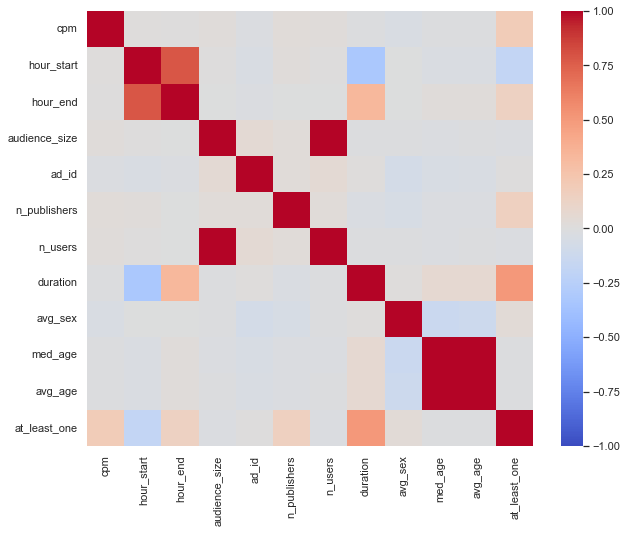

In [28]:
def do_heatmap():
    sns.heatmap(pd.merge(ads, target, on="ad_id").corr(),
                vmin=-1, vmax=1, cmap='coolwarm')
do_heatmap()

In [29]:
# ads = ads.drop(["n_users", "avg_sex", "avg_age", "med_age"], axis=1)

In [30]:
ads = ads.assign(
    total_cost=ads.duration * ads.audience_size,
    cost_per_min=ads.cpm / ads.duration,
    cpm_x_duration=ads.cpm * ads.duration,
    start_time_of_day=np.mod(ads.hour_start, np.full_like(ads.hour_start, 24)),
    end_time_of_day=np.mod(ads.hour_end, np.full_like(ads.hour_start, 24)))

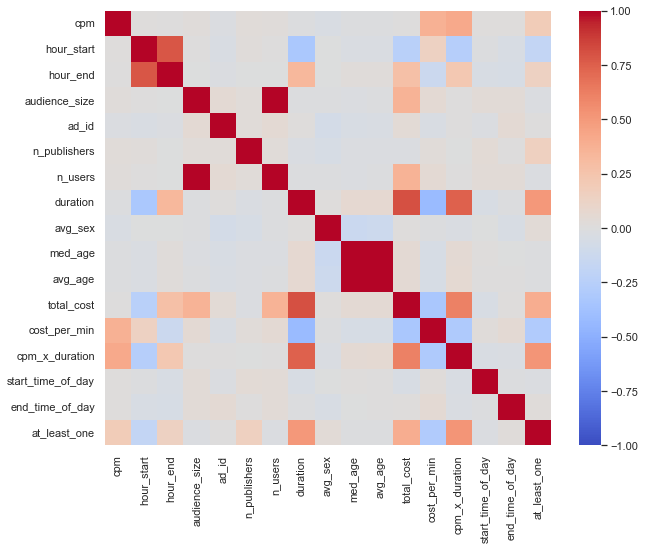

In [31]:
do_heatmap()

In [32]:
# ads = ads.drop(["start_time_of_day", "end_time_of_day"], axis=1)

<AxesSubplot:xlabel='cpm', ylabel='Count'>

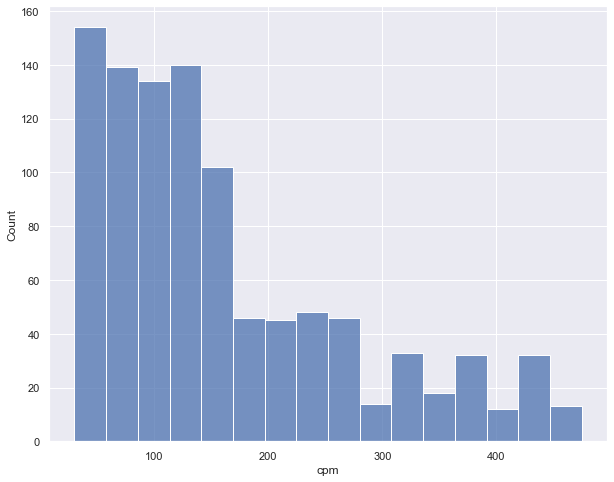

In [33]:
sns.histplot(ads, x="cpm")

<AxesSubplot:xlabel='cpm', ylabel='Count'>

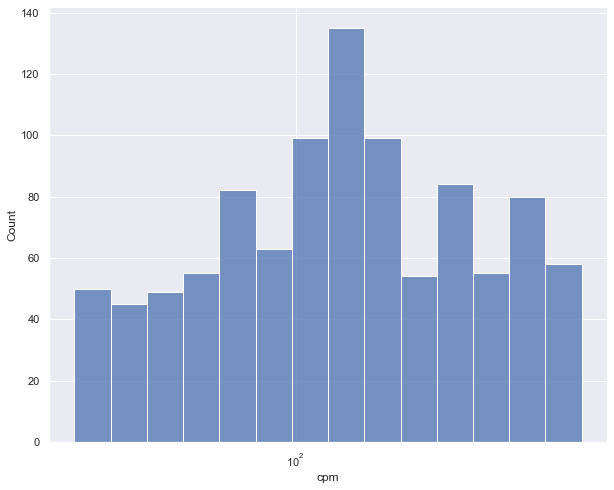

In [34]:
sns.histplot(ads, x="cpm", log_scale=True)

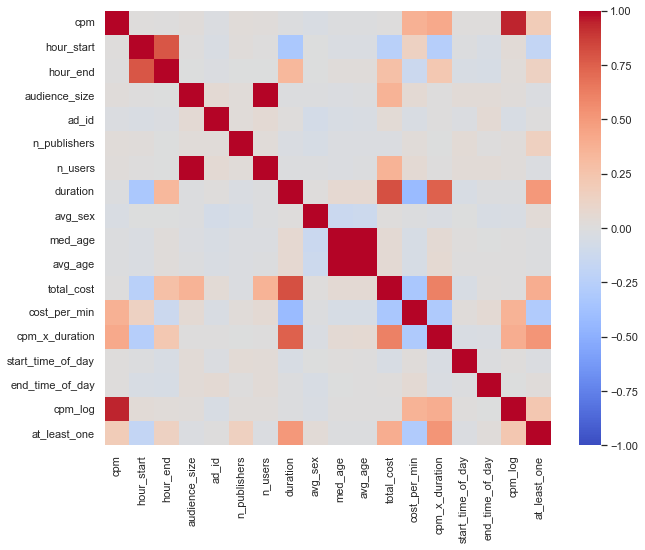

In [35]:
ads = ads.assign(cpm_log=np.log(ads.cpm))
do_heatmap()

<AxesSubplot:xlabel='duration', ylabel='Count'>

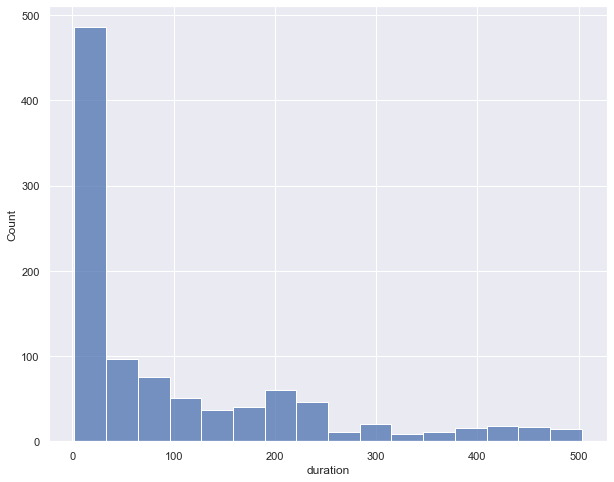

In [36]:
sns.histplot(ads, x="duration")

<AxesSubplot:xlabel='duration', ylabel='Count'>

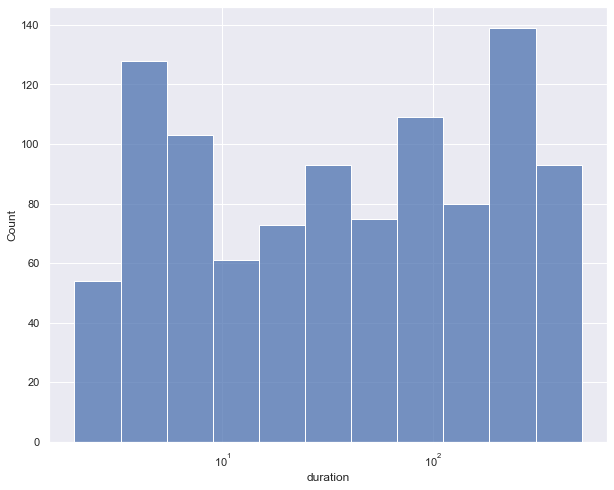

In [37]:
sns.histplot(ads, x="duration", log_scale=True)

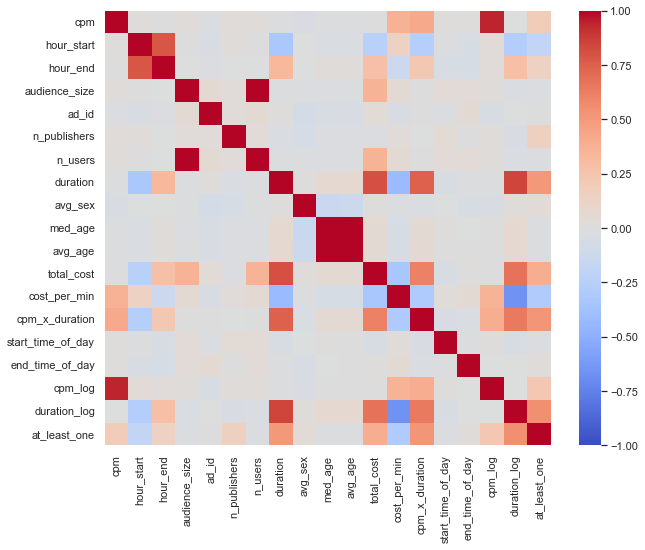

In [38]:
ads = ads.assign(duration_log=np.log(ads.duration))
do_heatmap()

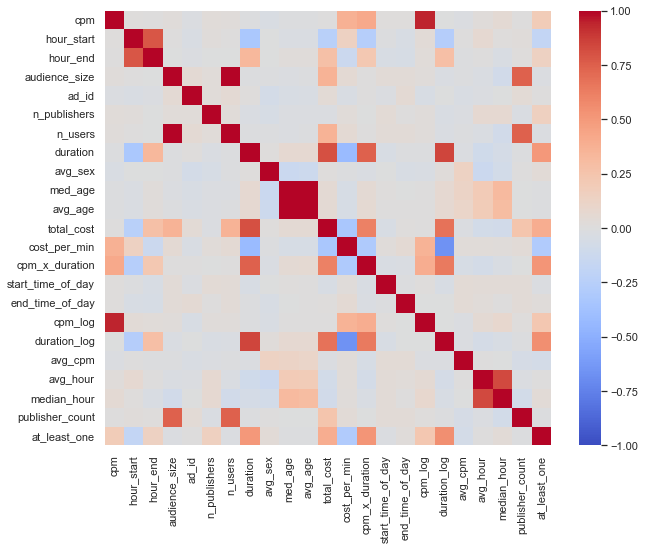

In [39]:
ads = ads.assign(
    avg_cpm=ads.user_ids.apply(lambda s: history.iloc[[int(id) for id in s.split(',')]].cpm.mean()),
    avg_hour=ads.user_ids.apply(lambda s: history.iloc[[int(id) for id in s.split(',')]].hour.mean()),
    median_hour=ads.user_ids.apply(lambda s: history.iloc[[int(id) for id in s.split(',')]].hour.median()),
    publisher_count=ads.user_ids.apply(lambda s: history.iloc[[int(id) for id in s.split(',')]].publisher.unique().size),
)
do_heatmap()

In [40]:
# ads = ads.drop(["avg_hour", "median_hour", "publisher_count"], axis=1)

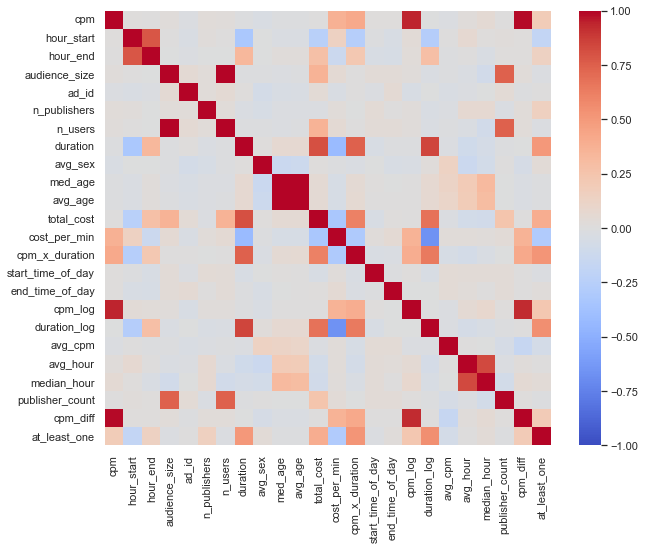

In [41]:
ads = ads.assign(
    cpm_diff=ads.cpm - ads.avg_cpm
)
do_heatmap()

In [42]:
ads = ads.drop(["publisher_count", "avg_hour", "avg_age", "start_time_of_day", "end_time_of_day", "audience_size", "n_users"], axis=1)

In [43]:
from sklearn.model_selection import train_test_split
train = ads.merge(target, on="ad_id").drop(["user_ids", "publishers", "ad_id"], axis=1)
X = train.drop("at_least_one", axis=1)
y = train.at_least_one
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [48]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.02, iterations=20000, depth=2,
                          task_type="GPU", random_strength=2, border_count=350, eval_metric='MAPE')
model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1072461	test: 0.1126099	best: 0.1126099 (0)	total: 4.54ms	remaining: 1m 30s
1:	learn: 0.1064451	test: 0.1120737	best: 0.1120737 (1)	total: 12.4ms	remaining: 2m 4s
2:	learn: 0.1056647	test: 0.1113851	best: 0.1113851 (2)	total: 16.5ms	remaining: 1m 49s
3:	learn: 0.1048979	test: 0.1107310	best: 0.1107310 (3)	total: 18.9ms	remaining: 1m 34s
4:	learn: 0.1041202	test: 0.1101480	best: 0.1101480 (4)	total: 22.6ms	remaining: 1m 30s
5:	learn: 0.1034276	test: 0.1096458	best: 0.1096458 (5)	total: 25.1ms	remaining: 1m 23s
6:	learn: 0.1027335	test: 0.1091914	best: 0.1091914 (6)	total: 27.7ms	remaining: 1m 19s
7:	learn: 0.1020248	test: 0.1087349	best: 0.1087349 (7)	total: 30.6ms	remaining: 1m 16s
8:	learn: 0.1013010	test: 0.1081262	best: 0.1081262 (8)	total: 34ms	remaining: 1m 15s
9:	learn: 0.1006086	test: 0.1076405	best: 0.1076405 (9)	total: 38.2ms	remaining: 1m 16s
10:	learn: 0.0999356	test: 0.1071951	best: 0.1071951 (10)	total: 40.9ms	remaining: 1m 14s
11:	learn: 0.0992509	test: 0.1066

In [45]:
sample_solution["at_least_one"] = model.predict(
    ads.loc[ads['ad_id'] >= 700].drop(["user_ids", "publishers", "ad_id"], axis=1))

In [46]:
sample_solution.head()

,ad_id,at_least_one
0,700,0.025847
1,701,0.129961
2,702,0.015809
3,703,0.019798
4,704,0.022121


In [47]:
sample_solution.to_csv('submission.csv', index=False)

Maxim Mikhaylov